## Data Exploration

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
from pathlib import Path

project_root = Path.cwd().parents[0]
sys.path.append(str(project_root))

from src.features.feature_engineering import feature_engineering

In [22]:
DATAPATH = "/Users/erik/Documents/GitHub/customer-churn-prediction/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [7]:
df = pd.read_csv(DATAPATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [10]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
churn_counts = df['Churn'].value_counts().sort_index()
print(churn_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


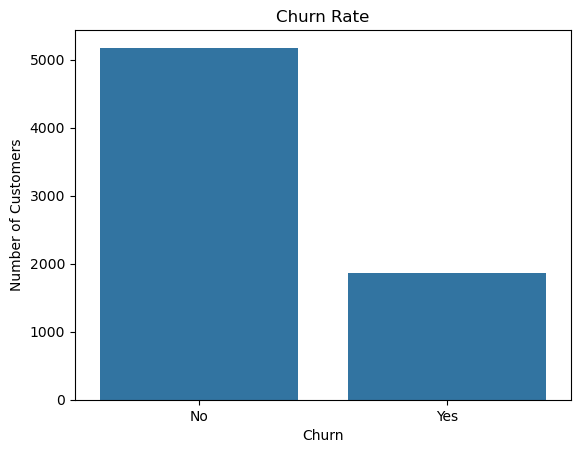

In [19]:
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title("Churn Rate")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

In [26]:
X, y = feature_engineering(df)

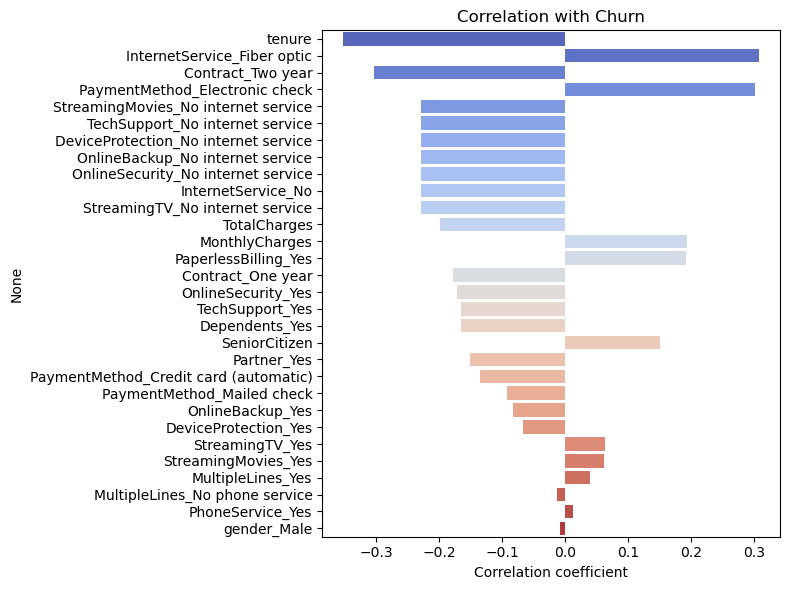

In [38]:
X["Churn"] = y
churn_corr = X.corr()['Churn'].drop('Churn').sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=churn_corr.values,
    y=churn_corr.index,
    hue=churn_corr.index,
    palette="coolwarm",
    legend=False                 
)
plt.title("Correlation with Churn")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

/var/folders/5_/6215xgmx2c15ch816v72b9d00000gn/T/ipykernel_62551/1075509119.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x="Contract", y="Churn", data=df.replace({'Yes': 1, 'No': 0}))


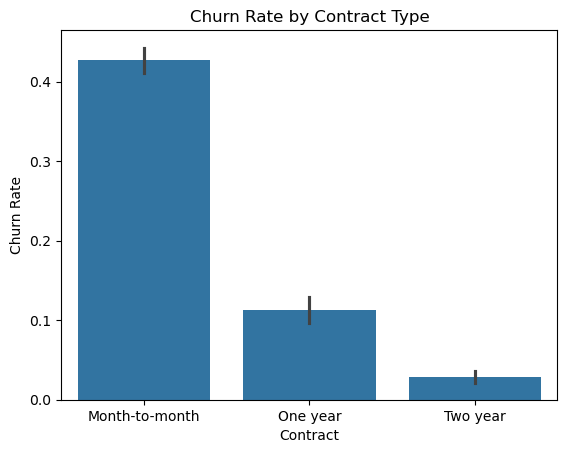

In [39]:
sns.barplot(x="Contract", y="Churn", data=df.replace({'Yes': 1, 'No': 0}))
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")

plt.show()

/var/folders/5_/6215xgmx2c15ch816v72b9d00000gn/T/ipykernel_62551/2932604801.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x="PaymentMethod", y="Churn", data=df.replace({'Yes': 1, 'No': 0}))


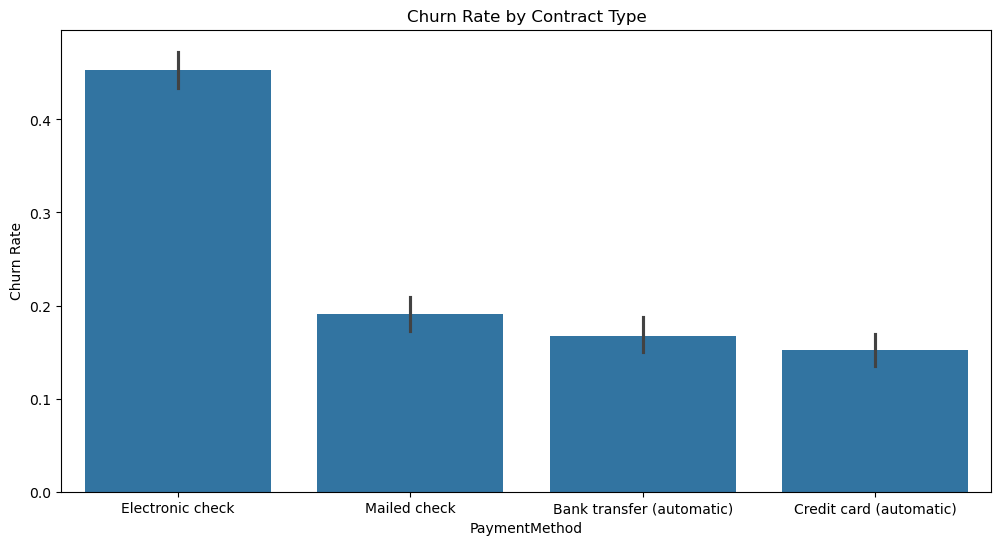

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x="PaymentMethod", y="Churn", data=df.replace({'Yes': 1, 'No': 0}))
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()

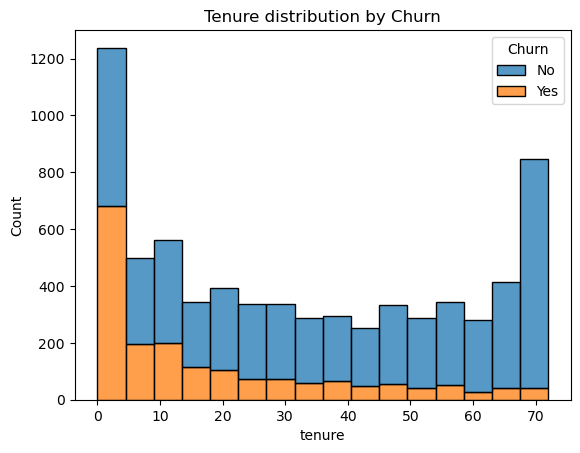

In [41]:
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack")
plt.title("Tenure distribution by Churn")
plt.show()

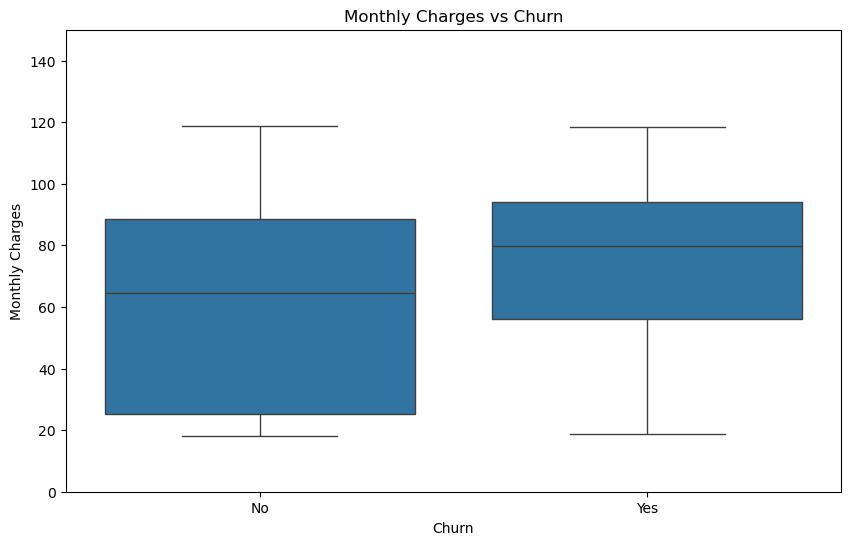

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.ylabel("Monthly Charges")
plt.ylim(0, 150)
plt.show()

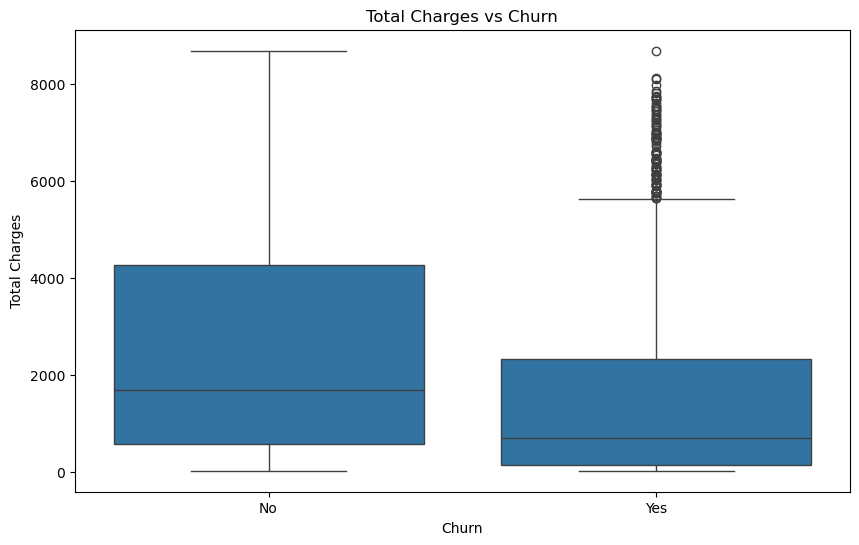

In [53]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Churn", y="TotalCharges")
plt.title("Total Charges vs Churn")
plt.ylabel("Total Charges")
plt.show()